C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


There are 21 features in the dataset.
There are 146 people in the dataset.
There are 18 Person of Interest in the dataset.

Initial Features List: 
['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi']

Initial Features Ranking: 

Feature importance in descending order:
['bonus', 'total_payments', 'from_messages', 'restricted_stock', 'long_term_incentive', 'expenses', 'other', 'exercised_stock_options', 'deferred_income', 'from_this_person_to_poi', 'total_stock_value', 'to_messages', 'shared_receipt_with_poi', 'salary', 'restricted_stock_deferred', 'loan_advances', 'from_poi_to_this_person', 'director_fees', 'deferral_payments']
[0.17958795431428407, 0.1

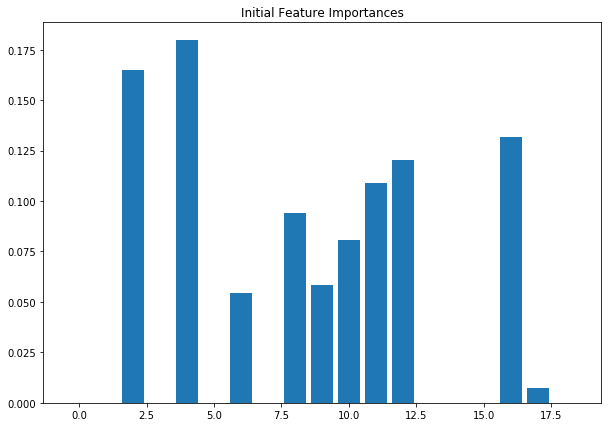

In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from pprint import pprint

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data
from helper import *

from matplotlib import pyplot
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split, cross_val_score
import evaluate



###########################################
######## Step 1: Select Features ##########
###########################################

# 3 types of features have been provided
financial_features = [
                      'salary', 
                      'deferral_payments', 
                      'total_payments', 
                      'loan_advances', 
                      'bonus', 
                      'restricted_stock_deferred', 
                      'deferred_income', 
                      'total_stock_value', 
                      'expenses', 
                      'exercised_stock_options', 
                      'other', 
                      'long_term_incentive', 
                      'restricted_stock', 
                      'director_fees'
                    ]

# (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)
email_features = [
                  'to_messages',  
                  'from_poi_to_this_person', 
                  'from_messages', 
                  'from_this_person_to_poi', 
                  'shared_receipt_with_poi'
                 ] 

poi = ['poi'] # (boolean, represented as integer)

# List of all features; poi must be the first label - used later with targetFeatureSplit
features_list = poi + financial_features + email_features

# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
## Print information about dataset
print "There are " + str(len(data_dict['SKILLING JEFFREY K'])) + " features in the dataset."
print "There are " + str(len(data_dict)) + " people in the dataset."

count = 0
for name in data_dict:
    if data_dict[name]['poi'] == True:
        count += 1
print "There are " + str(count) + " Person of Interest in the dataset."
    
print "\nInitial Features List: "
pprint(features_list)
print "\nInitial Features Ranking: "
pprint((gfr(data_dict, features_list))) 


Plot before Outlier Removal:


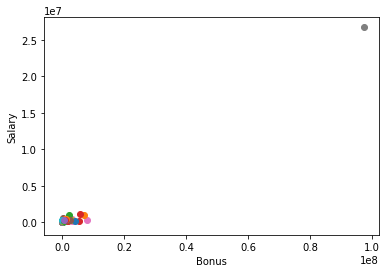


-> Outlier Value :97343619.0
 
Plot after Outlier Removal:


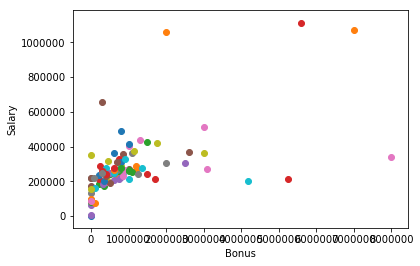

In [2]:
###########################################
####### Step 2 : Remove Outliers ##########
###########################################

features = ["bonus", "salary"]
data = featureFormat(data_dict, features)

# Plot bonus and salary to visualize any possible outliers
print "Plot before Outlier Removal:"
pyplot.xlabel("Bonus")
pyplot.ylabel("Salary")
for point in data:
    pyplot.scatter(point[0], point[1]) # (bonus, salary)
pyplot.show()


print "\n-> Outlier Value :" + str(data.max()) # The max value lies far away from other vales.


## Get outlier values
# Bonus Outlier
temp_max = 0
for name in data_dict:
    bonus = data_dict[name]['bonus'] 
    if bonus == 'NaN': 
        continue
    if temp_max < bonus: temp_max = bonus
# print temp


## 2 outliers are present in data
# 'TOTAL' is the accumulated value over all entries and hence should be removed
# 'THE TRAVEL AGENCY IN THE PARK' does not represent a person, hence should be removed

outliers = ['TOTAL', 'THE TRAVEL AGENCY IN THE PARK']
for outlier in outliers:
    data_dict.pop(outlier, 0)

    
## Plot data after outlier removal
# A better visualisation of data can be observed afetr outlier removal
print " \nPlot after Outlier Removal:"
features = ["bonus", "salary"]
data = featureFormat(data_dict, features)

pyplot.xlabel("Bonus")
pyplot.ylabel("Salary")
for point in data:
    pyplot.scatter(point[0], point[1]) # (bonus, salary)
pyplot.show()    



x-----------------INITIAL FEATURES RANKING-------------------x

Feature importance in descending order:
['exercised_stock_options', 'restricted_stock', 'total_payments', 'bonus', 'long_term_incentive', 'from_messages', 'expenses', 'other', 'shared_receipt_with_poi', 'salary', 'from_this_person_to_poi', 'total_stock_value', 'to_messages', 'restricted_stock_deferred', 'loan_advances', 'from_poi_to_this_person', 'director_fees', 'deferred_income', 'deferral_payments']
[0.19984012789768188, 0.12054494260342233, 0.11298765432098762, 0.1091318137409264, 0.10895238095238094, 0.10375925925925925, 0.064896989949621606, 0.061801226803323242, 0.057777777777777775, 0.052962962962962962, 0.0073448637316560501, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
6 Best Features: ['shared_receipt_with_poi', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'emails_to_poi_fraction']


x-----------------NEW FEATURES RANKING-------------------x

Feature importance in descending order:
['other', 

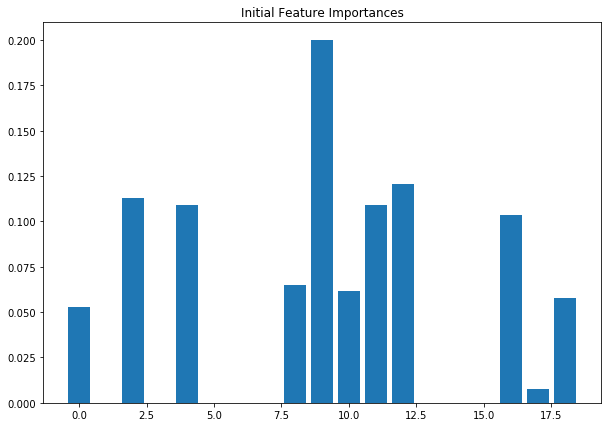

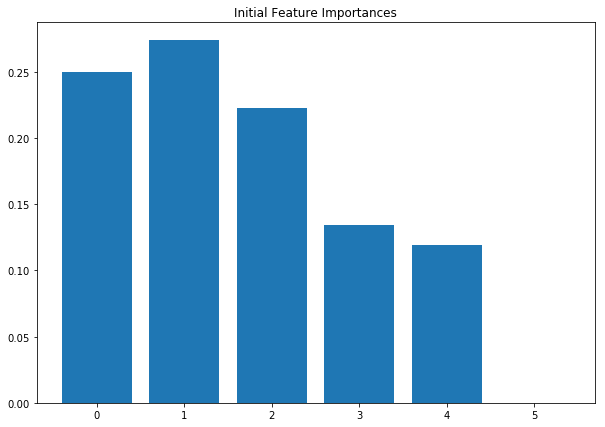

In [3]:

###########################################
####### Step 3 : Add new feature(s) #######
###########################################


print "\nx-----------------INITIAL FEATURES RANKING-------------------x"
## A important tool used for feature selection is feature_importances_
## -> use this to get an idea of how important a feature is
# print features_list
gfr(data_dict, features_list)


for key in data_dict:
    data = data_dict[key]
    data["emails_from_poi_fraction"] = calculate_fraction(data['from_poi_to_this_person'], data['to_messages'])
    data["emails_to_poi_fraction"] = calculate_fraction(data['from_this_person_to_poi'], data['from_messages'])

    
# Remove extraneous features from original feature list
# Final Feature List
features_list = ['poi',
                 'exercised_stock_options',
                 'other',
                 'expenses',
                 'emails_to_poi_fraction',
                 'shared_receipt_with_poi',
                 'total_stock_value'
                ]



## Go for selectKBest to pick high performing features
num_features = 6
select_k_best(data_dict, features_list, num_features)


## Compute importance of new features list for additional insights
## emails_to_poi_fraction ranks third. Interesting...
print "\nx-----------------NEW FEATURES RANKING-------------------x"
gfr(data_dict, features_list)


# Store to my_dataset for easy export below.
my_dataset = data_dict



# extract the features specified in features_list
data = featureFormat(my_dataset, features_list, sort_keys = True) # returns numpy array

# split into labels and features
# the first feature in the array is label thats why poi is put first
labels, features = targetFeatureSplit(data)

# Scale features using min-max
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

# Split data into training and test data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)



--------------------------------EVALUATING CLASSIFIERS---------------------------------
 
-> Classifier: Naive Bayes
GaussianNB(priors=None)
precision: 0.373142929293
recall:    0.241118686869
Accuracy: 0.93 (+/- 0.00)

-> Visualising Performance ----


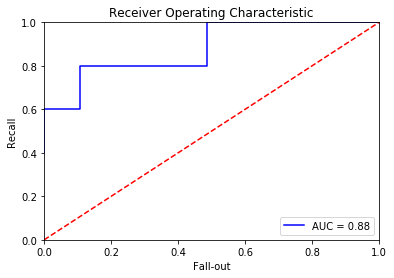

 

x------------------------------------------------------------------------------x
 
-> Classifier: Nearest Neighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
precision: 0.411849603175
recall:    0.218414069264
Accuracy: 0.86 (+/- 0.00)

-> Visualising Performance ----


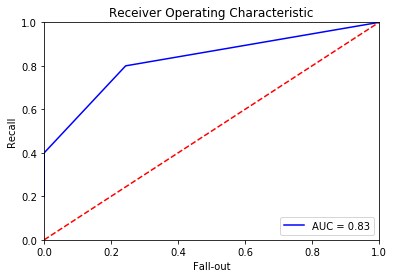

 

x------------------------------------------------------------------------------x
 
-> Classifier: Linear SVM
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
precision: 0.0
recall:    0.0
Accuracy: 0.88 (+/- 0.00)

-> Visualising Performance ----


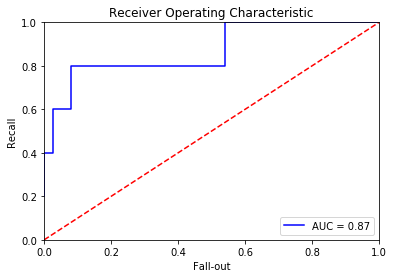

 

x------------------------------------------------------------------------------x
 
-> Classifier: RBF SVM
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
precision: 0.151833333333
recall:    0.0338388888889
Accuracy: 0.88 (+/- 0.00)

-> Visualising Performance ----


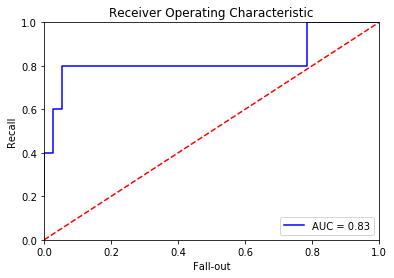

 

x------------------------------------------------------------------------------x
 
-> Classifier: Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
precision: 0.373359665335
recall:    0.352594588745
Accuracy: 0.88 (+/- 0.00)

-> Visualising Performance ----


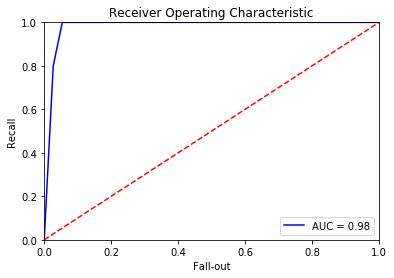

 

x------------------------------------------------------------------------------x
 
-> Classifier: Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
precision: 0.404909126984
recall:    0.227013636364
Accuracy: 0.90 (+/- 0.00)

-> Visualising Performance ----


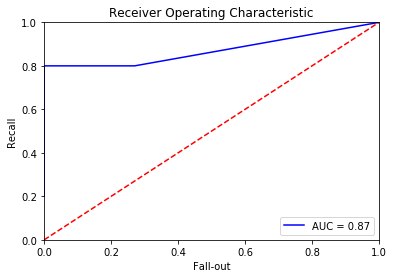

 

x------------------------------------------------------------------------------x
 
-> Classifier: AdaBoost
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
precision: 0.457395260295
recall:    0.366957503608
Accuracy: 0.88 (+/- 0.00)

-> Visualising Performance ----


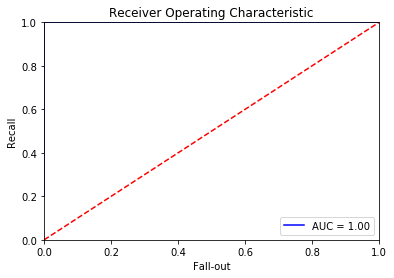

 

x------------------------------------------------------------------------------x
 
-> Classifier: Extra Trees
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
precision: 0.488873809524
recall:    0.158714321789
Accuracy: 0.88 (+/- 0.00)

-> Visualising Performance ----


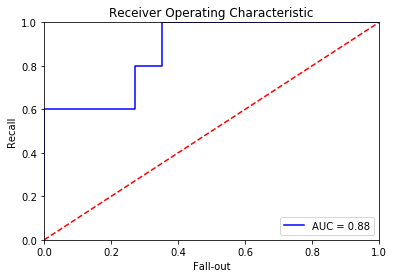

 

x------------------------------------------------------------------------------x
** Using Precision,recall, accuracy and roc_curve; Decision Tree Classifier turns out         to be the best classifier.




In [5]:
#############################################################
######### Step 4 : Work with different classifiers ##########
#############################################################



clf_names = [
        "Naive Bayes",     
        "Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Decision Tree",
         "Random Forest", 
         "AdaBoost",          
         "Extra Trees"
        ]

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5, max_features=4, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=4, random_state=42),
    AdaBoostClassifier(algorithm='SAMME.R'),
    ExtraTreesClassifier(max_depth=5)
]

print "--------------------------------EVALUATING CLASSIFIERS---------------------------------"
 # iterate over classifiers
for name, clf in zip(clf_names, classifiers):
        clf.fit(features_train, labels_train)
        scores = clf.score(features_test,labels_test)
        print " "
        print "-> Classifier: " + name
        evaluate.evaluate_clf(clf, features, labels, num_iters=1000, test_size=0.3)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        print "\n-> Visualising Performance ----"
        plot_roc(clf, features_test, labels_test)
        print " "
        print "\nx------------------------------------------------------------------------------x"

print "** Using Precision,recall, accuracy and roc_curve; Decision Tree Classifier turns out \
        to be the best classifier.\n\n"

In [6]:
###########################################
###### Step 5 : Tune the Classifier #######
###########################################

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

dt_clf = DecisionTreeClassifier() 
parameters = {
    'max_depth': [1,2,3,4,5,6,8,9,10],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5,6,7,8], 
    'criterion':('gini', 'entropy')
    }
grid_search = GridSearchCV(dt_clf, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
grid_search.fit(features, labels)
print 'Best Score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t %s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(features_test)
print 'Accuracy:', accuracy_score(labels_test, predictions)
print 'Precision:', precision_score(labels_test, predictions)
print 'Recall:', recall_score(labels_test, predictions)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   11.6s


Best Score: 0.893
Best parameters set:
	 criterion: 'gini'
	 max_depth: 4
	 min_samples_leaf: 4
	 min_samples_split: 5
Accuracy: 0.928571428571
Precision: 0.75
Recall: 0.6


[Parallel(n_jobs=-1)]: Done 1713 out of 1728 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   15.8s finished


Using grid search, the best parameters for our classifier can be seen.

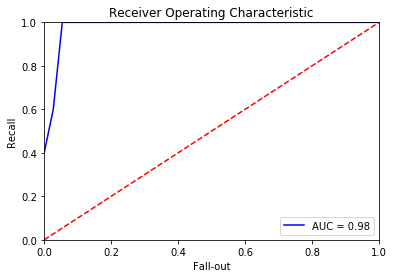

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.87129	Precision: 0.57174	Recall: 0.39450	F1: 0.46686	F2: 0.42058
	Total predictions: 14000	True positives:  789	False positives:  591	False negatives: 1211	True negatives: 11409



In [10]:
###########################################
###### Step 6 : Test the Classifier #######
###########################################

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=5)
clf.fit(features, labels)
plot_roc(clf, features_test, labels_test)


test_classifier(clf, my_dataset, features_list)

# Dump your classifier, dataset, and features_list so
# anyone can run/check your results.

dump_classifier_and_data(clf, my_dataset, features_list)

